Setting the working directory and loading the data:

In [ ]:
setwd("/Users/etheredgej/Desktop/")
load("R.workspace.1.31.2017.RData")
library(gplots)

Creating a table of expression values for only differentially expressed genes relative to the immature neuron "average" sample:

In [12]:
#####
# Hemilineage HC (>100 FPKM, 2-fold, q<0.1)
#####

# Creates table with Pan-Larval and Hemilineage FPKMs and all pairwise one way ANOVA q-values 
# cuffdata <- read.delim(file="gene_exp.diff", sep="\t")
LarvalandHemiFPKMs_qthresholded <- subset(cuffdata, sample_1=="larva" & sample_2=="4B")
colnames(LarvalandHemiFPKMs_qthresholded)[colnames(LarvalandHemiFPKMs_qthresholded)=="value_1"] <- "Pan.Larval" #c8
colnames(LarvalandHemiFPKMs_qthresholded)[colnames(LarvalandHemiFPKMs_qthresholded)=="value_2"] <- "Hemi.4B" #c9
colnames(LarvalandHemiFPKMs_qthresholded)[colnames(LarvalandHemiFPKMs_qthresholded)=="q_value"] <- "Hemi.4B_q" #c13
LarvalandHemiFPKMs_qthresholded$Hemi.12B <- subset(cuffdata, sample_1 == "larva" & sample_2 == "12B")$value_2 #c15
LarvalandHemiFPKMs_qthresholded$Hemi.12A <- subset(cuffdata, sample_1 == "larva" & sample_2 == "12A")$value_2 #c16
LarvalandHemiFPKMs_qthresholded$Hemi.1A <- subset(cuffdata, sample_1 == "larva" & sample_2 == "1A")$value_2 #c17
LarvalandHemiFPKMs_qthresholded$Pan.A <- subset(cuffdata, sample_1 == "larva" & sample_2 == "panA")$value_2 #c18
LarvalandHemiFPKMs_qthresholded$Hemi.21A <- subset(cuffdata, sample_1 == "larva" & sample_2 == "21A")$value_2 #c19
LarvalandHemiFPKMs_qthresholded$Pan.Young <- subset(cuffdata, sample_1 == "larva" & sample_2 == "young")$value_2 #c20
LarvalandHemiFPKMs_qthresholded$Pan.Old <- subset(cuffdata, sample_1 == "larva" & sample_2 == "old")$value_2 #c21
LarvalandHemiFPKMs_qthresholded$Hemi.5B <- subset(cuffdata, sample_1 == "larva" & sample_2 == "19A")$value_2 #c22
LarvalandHemiFPKMs_qthresholded$Hemi.15B <- subset(cuffdata, sample_1 == "larva" & sample_2 == "15B")$value_2 #c23
LarvalandHemiFPKMs_qthresholded$Hemi.12B_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "12B")$q_value #c24
LarvalandHemiFPKMs_qthresholded$Hemi.12A_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "12A")$q_value #c25
LarvalandHemiFPKMs_qthresholded$Hemi.1A_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "1A")$q_value #c26
LarvalandHemiFPKMs_qthresholded$Pan.A_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "panA")$q_value #c27
LarvalandHemiFPKMs_qthresholded$Hemi.21A_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "21A")$q_value #c28
LarvalandHemiFPKMs_qthresholded$Pan.Young_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "young")$q_value #c29
LarvalandHemiFPKMs_qthresholded$Pan.Old_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "old")$q_value #c30
LarvalandHemiFPKMs_qthresholded$Hemi.5B_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "19A")$q_value #c31
LarvalandHemiFPKMs_qthresholded$Hemi.15B_q <- subset(cuffdata, sample_1 == "larva" & sample_2 == "15B")$q_value #c32
LarvalandHemiFPKMs_qthresholded2 <- LarvalandHemiFPKMs_qthresholded[,c(3,8,9,15:23,13,24:32)]
rownames(LarvalandHemiFPKMs_qthresholded2) <- LarvalandHemiFPKMs_qthresholded[,3]
LarvalandHemiFPKMs_qthresholded2[,1] <- NULL
head(LarvalandHemiFPKMs_qthresholded2)

# Subsetting on a q value set by q_threshold variable.

q_threshold=0.1

LarvalandHemiFPKMs_qthresholded_only_q_0.1 <- subset(LarvalandHemiFPKMs_qthresholded2, 
	Hemi.4B_q<q_threshold
		| Hemi.12B_q<q_threshold
		| Hemi.12A_q<q_threshold
		| Hemi.1A_q<q_threshold
		| Pan.A_q<q_threshold
		| Hemi.21A_q<q_threshold
		| Pan.Young_q<q_threshold
		| Pan.Old_q<q_threshold
		| Hemi.5B_q<q_threshold
		| Hemi.15B_q<q_threshold
	)

head(LarvalandHemiFPKMs_qthresholded_only_q_0.1,50)


AllDEGs<-subset(LarvalandHemiFPKMs_qthresholded_only_q_0.1[c(1:11)], 
(Pan.Larval>100 |
Pan.A>100 |
Pan.Old>100 |
Pan.Young>100 |
Hemi.12A>100 |
Hemi.21A>100 |
Hemi.1A>100 |
Hemi.12B>100 |
Hemi.5B>100 |
Hemi.4B>100 |
Hemi.15B>100
) &
( 
Pan.Larval>2*Pan.Young | Pan.Young>2*Pan.Larval | 
Pan.Larval>2*Pan.Old | Pan.Old>2*Pan.Larval | 
Pan.Larval>2*Pan.A | Pan.A>2*Pan.Larval | 
Pan.Larval>2*Hemi.12A | Hemi.12A>2*Pan.Larval | 
Pan.Larval>2*Hemi.21A | Hemi.21A>2*Pan.Larval | 
Pan.Larval>2*Hemi.1A | Hemi.1A>2*Pan.Larval | 
Pan.Larval>2*Hemi.12B | Hemi.12B>2*Pan.Larval | 
Pan.Larval>2*Hemi.4B | Hemi.4B>2*Pan.Larval |
Pan.Larval>2*Hemi.5B | Hemi.5B>2*Pan.Larval |
Pan.Larval>2*Hemi.15B | Hemi.15B>2*Pan.Larval 
))

,Pan.Larval,Hemi.4B,Hemi.12B,Hemi.12A,Hemi.1A,Pan.A,Hemi.21A,Pan.Young,Pan.Old,Hemi.5B,⋯,Hemi.4B_q,Hemi.12B_q,Hemi.12A_q,Hemi.1A_q,Pan.A_q,Hemi.21A_q,Pan.Young_q,Pan.Old_q,Hemi.5B_q,Hemi.15B_q
128up,39.28940,26.41040,41.943200,29.94070,25.05110,37.77460,23.83100,36.93200,36.05940,23.95970,⋯,0.727264,0.968202,0.838208,0.714255,0.982276,0.61512800,0.967999,0.959180,0.64184500,0.88558000
14-3-3epsilon,3330.34000,2983.13000,3118.090000,3111.65000,2841.41000,2443.82000,3181.97000,3148.58000,3321.14000,2975.03000,⋯,0.766705,0.886397,0.879816,0.656020,0.249753,0.92356300,0.900341,0.994929,0.76107800,0.59762300
14-3-3zeta,1939.23000,2188.05000,2290.260000,2117.15000,2418.30000,2433.32000,3132.78000,1861.93000,2493.42000,3718.52000,⋯,0.670733,0.617238,0.844313,0.504859,0.475258,0.00477435,0.936993,0.341823,0.00143731,0.00143731
140up,8.53226,11.33240,6.827030,7.79175,10.56480,8.26238,25.08020,12.97040,10.73790,8.77018,⋯,0.941298,0.963204,0.983109,0.960812,0.993981,0.62787000,0.894341,0.954890,0.99411000,0.95490100
18w,4.91187,2.35147,0.874775,7.66394,1.92495,4.02418,1.68006,4.53265,3.41544,2.26411,⋯,0.553134,0.150355,0.692287,0.494233,0.919523,0.34619300,0.965256,0.808014,0.51503800,0.16309400
26-29-p,102.92500,71.39560,86.875900,86.83560,103.69900,106.10500,48.22800,93.29650,101.67200,59.18500,⋯,0.588048,0.850208,0.846377,0.994745,0.979274,0.12139800,0.920724,0.990874,0.32556900,0.54559400


,Pan.Larval,Hemi.4B,Hemi.12B,Hemi.12A,Hemi.1A,Pan.A,Hemi.21A,Pan.Young,Pan.Old,Hemi.5B,⋯,Hemi.4B_q,Hemi.12B_q,Hemi.12A_q,Hemi.1A_q,Pan.A_q,Hemi.21A_q,Pan.Young_q,Pan.Old_q,Hemi.5B_q,Hemi.15B_q
14-3-3zeta,1939.230000,2.18805e+03,2.29026e+03,2117.150000,2.41830e+03,2.43332e+03,3.13278e+03,1.86193e+03,2493.420000,3.71852e+03,⋯,0.67073300,0.61723800,0.84431300,0.50485900,0.4752580,0.00477435,0.9369930,0.341823,0.00143731,0.00143731
2mit,85.362500,1.65421e+02,1.12685e+02,130.382000,1.66087e+02,8.48585e+01,1.58152e+02,6.73763e+01,85.476100,7.22697e+01,⋯,0.02751920,0.58646500,0.28932400,0.04544040,0.9942880,0.03630960,0.6658710,0.998150,0.81356900,0.00931944
5-HT1A,15.430600,1.36526e+01,6.20667e+01,5.586980,5.33355e+00,1.19393e+01,1.18947e+01,8.33920e+00,15.904600,3.71127e+01,⋯,0.92955800,0.00143731,0.17865700,0.21779500,0.8409120,0.80252300,0.4163900,0.981949,0.08750510,0.16587100
5-HT2,2.222520,8.71615e-01,2.06502e+00,2.152180,1.09642e+00,2.95589e+00,9.83358e+00,2.62833e+00,1.496600,1.24149e+00,⋯,0.60600100,0.97759900,0.98907600,0.74977800,0.9059230,0.09217550,0.9425470,0.856020,0.76557700,0.99249600
5-HT7,2.959950,6.78193e+00,4.07909e-01,3.009300,5.60001e+00,4.61259e+00,2.11870e+01,2.73468e+00,7.624030,2.06210e+01,⋯,0.50345800,0.24518500,0.99440500,0.72695200,0.8221230,0.01699510,0.9744930,0.409457,0.03052090,0.02690540
AP-2,9.959340,3.21777e-01,7.60897e-01,162.967000,2.18575e-01,2.38288e+01,6.56848e-02,1.36205e+01,6.125880,1.66434e-01,⋯,0.21251800,0.12468500,0.00143731,0.29564500,0.3842280,0.53386300,0.8276240,0.738936,0.37536500,0.10077300
AQP,0.000000,5.76052e-01,7.43029e-01,2.950990,5.50548e-01,5.65709e-01,1.17475e+00,1.00042e+00,0.529898,5.43473e-01,⋯,1.00000000,1.00000000,0.00143731,1.00000000,1.0000000,1.00000000,1.0000000,1.000000,1.00000000,1.00000000
ASPP,3.273510,4.71115e+00,1.61894e+00,5.897900,1.21714e+01,5.20448e+00,1.88615e+01,4.01975e+00,4.808830,5.51187e+00,⋯,0.82762400,0.63726400,0.63734000,0.16366400,0.7774800,0.01909820,0.9138460,0.808947,0.70046500,0.13427800
ATPsyn-beta,628.280000,5.77339e+02,5.70004e+02,544.097000,4.31751e+02,1.11532e+03,7.07351e+02,5.97243e+02,755.420000,6.51138e+02,⋯,0.89289300,0.86924900,0.77983000,0.35302100,0.0334318,0.81941700,0.9383920,0.666243,0.96007000,0.88843400
Abd-B,13.226200,5.88062e+00,2.14124e+00,7.493610,6.13291e+00,1.28424e+01,2.23829e+01,1.26767e+00,20.880800,6.58245e+01,⋯,0.37059300,0.05245980,0.56293900,0.77201000,0.9853290,0.47763400,0.0368754,0.595992,0.00143731,0.03169120


Clustering by row (genes) and by column (samples) and then determining the number of gene clusters using cutree on the dendrogram:

In [13]:
AllDEGs2<-AllDEGs+0.0000001
colnames(AllDEGs2)<- c("Immature","4B","12B","12A","1A","Immature A","21A","Immature Young","Immature Old","5B","15B")

####
# Working code to cluster heatmap.
# Row (gene) clustering
# linkage method is complete, but can be changed
# distance method is pearson, but can be changed
# "correlation" method seems to give the same result as 1-pearson
#hcluster combines amap library Dist() function and hclust()
#hr <- hclust(Dist(AllDEGs2, method="correlation"), method="complete")
hr <- hclust(as.dist(1-cor(t(AllDEGs2), method="pearson")), method="complete")
 
# Column (sample) clustering
# linkage method is complete, but can be changed
# distance method is spearman, but can be changed
hc <- hclust(as.dist(1-cor(AllDEGs2, method="spearman")), method="complete")
 
# cutree defines clusters and returns a vector of cluster membership
mycl <- cutree(hr, h=max(hr$height/2))

,5B,15B,21A,1A,12A,Immature Young,Immature A,Immature,Immature Old,4B,12B
nerfin-1,100.4110001,129.9920001,98.0548001,63.2220001,157.6230001,263.0540,101.9840001,137.79600,122.7130001,88.63500,71.72250
Ef1alpha48D,953.6500001,1356.7100001,864.7100001,491.8110001,672.2270001,1956.1300,961.3650001,944.48400,1127.5900001,695.03300,745.58100
cas,8.1423101,6.8861701,1.3371001,1.9262301,2.2211901,283.0120,2.5635301,15.43160,8.2197901,82.16330,2.41273
E(spl),2.0394901,0.1145921,0.0000001,0.0000001,0.0000001,107.1620,0.1549081,10.41400,0.3496391,18.11040,1.18950
pncr002:3R,46.5162001,6.7996001,299.2820001,12.6086001,79.7382001,1677.3900,37.7407001,135.39600,168.0010001,428.00300,45.54880
CG9973,56.2858001,43.9246001,32.2576001,50.5103001,21.6194001,149.2270,11.4220001,52.25900,44.4394001,88.63300,24.34390
pzg,48.7101001,43.6211001,39.9822001,83.8742001,58.0792001,102.6470,49.7254001,80.28890,66.6087001,73.28360,64.04970
Nrt,106.9980001,75.8979001,149.9700001,210.8610001,170.0520001,326.3010,158.2950001,220.70500,193.6550001,200.96000,128.58700
Jupiter,463.9220001,446.5620001,482.2510001,507.3330001,391.2080001,799.6880,361.0110001,819.55700,669.8260001,686.79900,457.86800
RpS8,554.8630001,565.4960001,899.3980001,552.4800001,578.3160001,986.1130,328.8000001,949.28900,1097.8300001,638.80700,682.26700


14-3-3zeta                       2mit 
                         1                          1 
                      AP-2                        Ald 
                         2                          3 
                      Antp                     Arp14D 
                         4                          5 
                  Atpalpha                        Bsg 
                         1                          1 
                        Bx                    CG10082 
                         2                          5 
                   CG10440                    CG10992 
                         2                          5 
                   CG11030                    CG11071 
                         6                          1 
                   CG11267                    CG11317 
                         5                          3 
                    CG1142                     CG1240 
                         5                          7 
                   CG12402                    CG12567 
                         8                          5 
                   CG12817                    CG13108 
                         1                          5 
                   CG13220                    CG13287 
                         5                          5 
                   CG13364                    CG13830 
                         5                          1 
                   CG13993                    CG14023 
                         5                          5 
                   CG14213                    CG14459 
                         5                          2 
                   CG14464                    CG14762 
                         5                          1 
                   CG14853                    CG14894 
                         8                          5 
                   CG14989                    CG15236 
                         3                          1 
                   CG15237                    CG15295 
                         5                          8 
                   CG15765                    CG15814 
                         1                          5 
                   CG16953                    CG17124 
                         5                          1 
                   CG17454                    CG18619 
                         5                          5 
                    CG2052                     CG2083 
                         7                          9 
                    CG2246                     CG2269 
                         5                          1 
                    CG2765                     CG2865 
                         8                          7 
                    CG2993                    CG30089 
                         1                          9 
                   CG31221                    CG31781 
                         1                          1 
                   CG31917                    CG31959 
                         5                          8 
                   CG32017                    CG32105 
                         3                          8 
                   CG32230                    CG32406 
                         5                          1 
                   CG32425                    CG32458 
                         5                          8 
                   CG32521                    CG32541 
                        10                          2 
                   CG32699                    CG33936 
                         5                          1 
                   CG33960                    CG34155 
                         4                          4 
                   CG34347                    CG34355 
                         8                          5 
                   CG34391                     CG3662 
                         8                          1 
                   CG40378                    CG40439 
 

CG14989                       Gad1 
                         3                          3 
                      Fas3                       heph 
                         3                          3 
                        ct                       salm 
                         3                          3 
                   CG11317                     CG9413 
                         3                          3 
                     TM4SF                    CG32017 
                         3                          3 
                       EcR               synaptogyrin 
                         3                          3 
                       PyK                        Ald 
                         3                          3 
                    Gapdh2                       SKIP 
                         3                         15 
                       hth                        emc 
                        15                         15 
                       mbl                        noe 
                        15                         13 
                   CR31846                        lbl 
                        13                         13 
                        vg                    CG42784 
                        13                         13 
                      VGAT                       Fer2 
                        13                         13 
                      scro                      abd-A 
                        13                         13 
                       toy                       Rbp6 
                        13                          5 
                       msi                    CG11267 
                         5                          5 
                   CG40378                       dpr7 
                         5                          5 
                     endoA                     Arp14D 
                         5                          5 
                      dpr9                    CG14464 
                         5                          5 
                   CG32699                      Tom40 
                         5                          5 
                   CG16953                     Dlc90F 
                         5                          5 
                       Gie                        Mnt 
                         5                          5 
                      slmb                     CG6860 
                         5                          5 
                  Zyx102EF                     CG6700 
                         5                          5 
                   CG15814                        pum 
                         5                          5 
                       Cys                       dpr8 
                         5                          5 
                    miple2                        Pxn 
                         5                          5 
                   CG10082                        fas 
                         5                          5 
                   CG13108                      RpL38 
                         5                          5 
                      caps                      dally 
                         5                          5 
                    CG5708                       Fis1 
                         5                          5 
                      LpR2                    CG12567 
                         5                          5 
                    CG7646              nAcRalpha-30D 
                         5                          5 
                    CG8446                     CG8490 
                         5                          5 
                   CG13287                      RpL39 
                         5                          5 
                   CG15237                    mRpS18A 
                         5                          5 
                    CG1142                    CG17454 
    

,Immature,4B,12B,12A,1A,Immature A,21A,Immature Young,Immature Old,5B,15B,clusterID
CG14989,925.99400,129.1740001,1171.1300001,1.36943e+02,35.0180001,7.33531e+02,70.9798001,851.95200,1105.50000,3215.1900,1.06325e+03,3
Gad1,51.97300,11.0389001,188.4480001,3.46427e+00,1.6639201,7.93081e+01,1.0516801,35.83790,77.41980,247.6920,9.21074e+01,3
Fas3,21.65430,8.4697401,38.9547001,2.14836e+01,13.7137001,1.18087e+01,4.7980101,33.20620,21.35650,86.7250,1.05771e+02,3
heph,51.19550,20.9236001,40.7209001,4.94674e+01,14.9308001,3.70235e+01,27.9881001,56.11770,49.72380,82.7696,1.04230e+02,3
ct,57.44550,26.2406001,37.8713001,2.00040e+01,15.9887001,3.32992e+01,44.2144001,65.67370,47.83250,212.7580,1.45528e+02,3
salm,45.68460,13.6870001,0.4297911,4.76404e+00,3.5546501,2.80437e+01,0.8133761,57.35430,42.91490,101.1210,6.04272e+01,3
CG11317,36.65700,131.8780001,15.8019001,3.30154e+01,58.1041001,4.26679e+01,54.2468001,24.29250,73.72990,139.2980,9.74327e+01,3
CG9413,38.23910,40.5851001,35.8437001,4.25027e+01,64.4322001,6.40063e+01,38.0830001,29.22250,54.60820,90.5233,1.25493e+02,3
TM4SF,11.84890,27.9400001,22.7846001,2.17408e+01,32.8595001,7.63200e+01,22.3219001,4.11436,59.47260,93.1741,1.32529e+02,3
CG32017,65.79100,55.4406001,77.7210001,5.67814e+01,70.6960001,9.40977e+01,106.9990001,58.96840,81.77720,155.1340,1.19968e+02,3


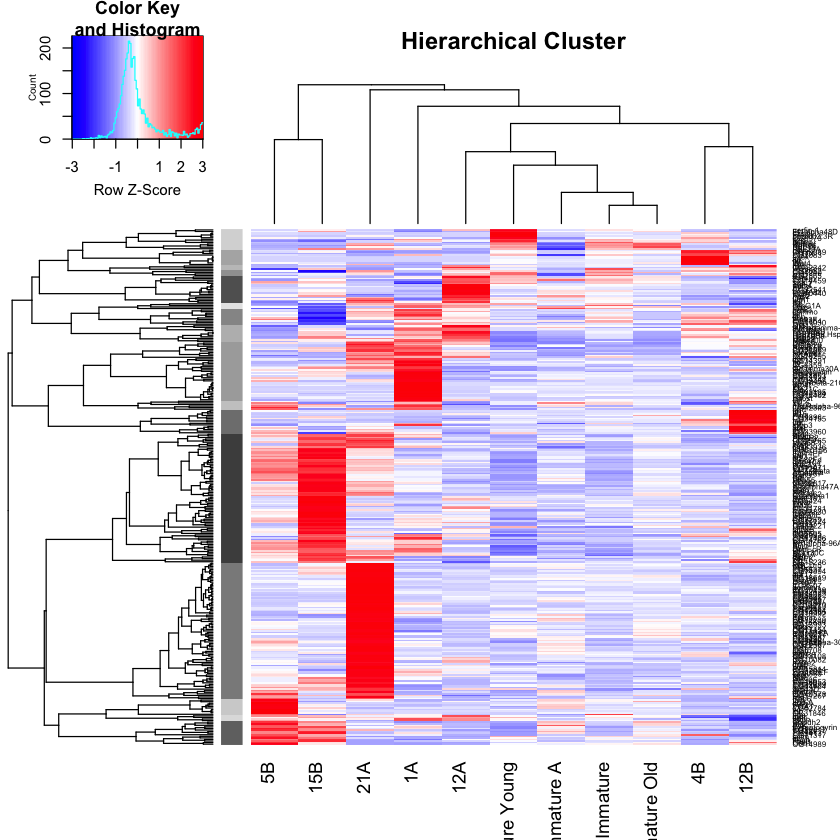

In [17]:
# get a color palette equal to the number of clusters
# Alternatively, this code will work: cluster_colors <- rainbow(length(unique(mycl)))
# cluster_colors <- colorRampPalette(brewer.pal(length(unique(mycl)), "PRGn"))(length(unique(mycl)))
cluster_colors <- gray.colors(length(unique(mycl)))

# create vector of colors for side bar
myClusterSideBar <- cluster_colors[mycl]

# choose a color palette for the heat map
# Alternative color scheme: myheatcol <- colorRampPalette(c("darkgray", "yellow", "orangered"))(n = 256)
# Alternative color scheme 2: myheatcol <- colorRampPalette(c("magenta", "grey35", "green"))(n=100)
myheatcol <- colorRampPalette(c("blue", "white", "red"))(n=100)

## Plot heatmap
heatmap.2(as.matrix(AllDEGs2), main="Hierarchical Cluster", Rowv=as.dendrogram(hr), Colv=as.dendrogram(hc), scale="row", col=myheatcol, density.info="histogram", trace="none", RowSideColors= myClusterSideBar, cexCol=1.4, margins=c(6,4))
 
## Return matrix with row/column sorting as in heatmap
AllDEGs2[rev(hr$labels[hr$order]), hc$labels[hc$order]]

# Display results of cutree in the order of the original data rows
mycl

# Display the cluster membership by its order in the heatmap
mycl[hr$order]

# show cluster 1 
cluster1 <- AllDEGs2[mycl == 1,]

#Add the cluster ID to your data
#Alternatively, this code will work: clusters <- cbind(AllDEGs2, clusterID=mycl)
clusters <- AllDEGs2
clusters$clusterID <- mycl

# Display data with cluster ID column, and ordered like the heat map
clusters[hr$order,]

#####
reorderedclusters <- clusters[rev(hr$order),]	
breaknumbers <- NULL
for (i in 1:length(unique(clusters$clusterID))) {
	breaknumbers[i] <- max(which(reorderedclusters$clusterID == i))
}
######
reorderedclusters2 <- transform(reorderedclusters, cluster=match(clusterID, unique(clusterID)))
reorderedclusters2[,"clusterID"] <- NULL

pdf 
  2

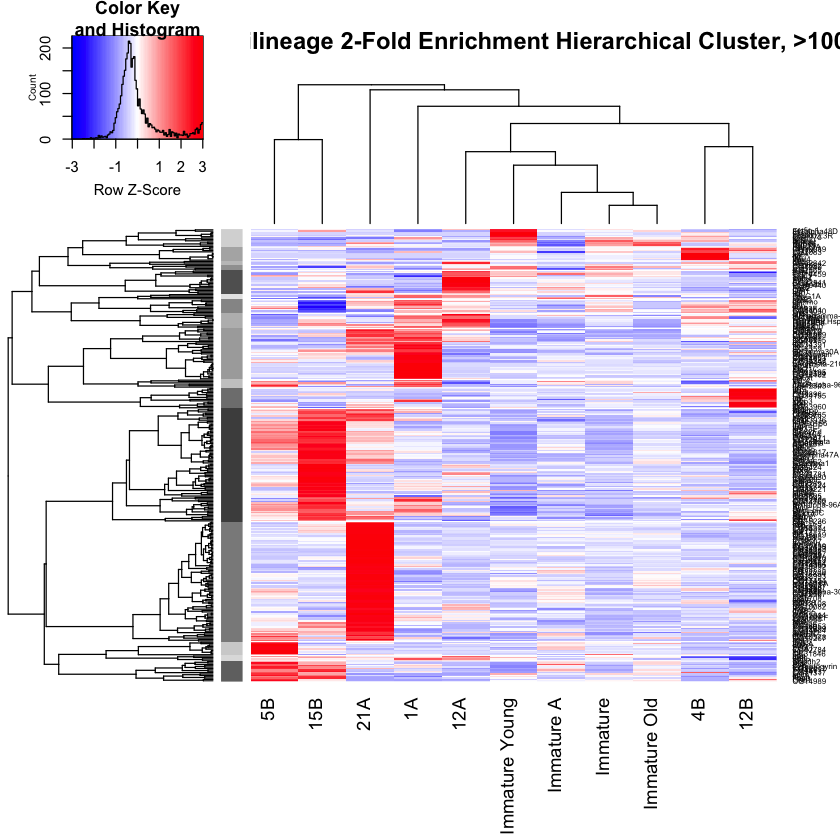

In [19]:
## Re-plot heatmap with breaks
heatmap.2(as.matrix(AllDEGs2), main="Immature and Hemilineage 2-Fold Enrichment Hierarchical Cluster, >100 FPKM, q<0.1", Rowv=as.dendrogram(hr), Colv=as.dendrogram(hc), scale="row", col=myheatcol, density.info="histogram", trace="none", denscol="black", RowSideColors= myClusterSideBar, 
	rowsep=breaknumbers, cexCol=1.4, margins=c(10,4))
	
## Save the output as a .png file
png(file = "Immature and Hemilineage 2-Fold Enrichment Over 100 FPKM Hierarchical Cluster q 0.1 fold changes to Larval only 04-27-17.png", width = 1400, height = 1400)
heatmap.2(as.matrix(AllDEGs2), main="Immature and Hemilineage 2-Fold Enrichment Hierarchical Cluster, >100 FPKM, q<0.1", Rowv=as.dendrogram(hr), Colv=as.dendrogram(hc), scale="row", col=myheatcol, density.info="histogram", denscol="black", trace="none", RowSideColors= myClusterSideBar, 
	rowsep=breaknumbers, cexCol=1.4, margins=c(10,4))
dev.off()

In [16]:
# Write table in order of clustering displayed
write.table(reorderedclusters2, "Pan_Larval_and_Hemilineage_hierarchy_clustered_ordered_2_fold_over_100_FPKM_q_0.1_fold_change_to_Larval_only_04_27_17.txt", sep="\t")